In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, InputLayer
from keras.optimizers import Adadelta, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from config import *

In [3]:
df = pd.read_excel(filename_all)

df['Date']  = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

# Month
df['Month']  = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].apply(lambda x: int(x))

# Day
df['Day'] = df['Date'].dt.strftime('%d')
df['Day'] = df['Day'].apply(lambda x: int(x))

# Week
df['Week']  = df['Date'].dt.isocalendar().week
df['Week'] = df['Week'].apply(lambda x: int(x))

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 7)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 7)

df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

In [4]:
df = df[['month_cos', 'month_sin', 'week_cos', 'week_sin', 'first']]

output = len(df['first'].unique())

In [5]:
X = df.drop('first', axis = 1)
y = df['first']
y = y.to_numpy()

scaler  = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = test_size, random_state = rand_state)

In [10]:
#def baseline_model():
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(125, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(output, activation='softmax'))
    
optimizer = Adadelta(learning_rate=0.001, rho = 0.95, epsilon = 1e-07)
    
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 3000, verbose = 1, validation_data = (X_test, y_test))

#prediction_test = model.predict(X_test)



    #return model

#estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=10, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Epoch 1/3000
58/58 [==============================] - 1s 6ms/step - loss: 3.2448 - accuracy: 0.0587 - val_loss: 3.2335 - val_accuracy: 0.0646
Epoch 2/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2516 - accuracy: 0.0564 - val_loss: 3.2331 - val_accuracy: 0.0646
Epoch 3/3000
58/58 [==============================] - 0s 3ms/step - loss: 3.2472 - accuracy: 0.0600 - val_loss: 3.2327 - val_accuracy: 0.0646
Epoch 4/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2417 - accuracy: 0.0692 - val_loss: 3.2323 - val_accuracy: 0.0677
Epoch 5/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2464 - accuracy: 0.0551 - val_loss: 3.2319 - val_accuracy: 0.0677
Epoch 6/3000
58/58 [==============================] - 0s 3ms/step - loss: 3.2447 - accuracy: 0.0647 - val_loss: 3.2316 - val_accuracy: 0.0677
Epoch 7/3000
58/58 [==============================] - 0s 3ms/step - loss: 3.2484 - accuracy: 0.0645 - val_loss: 3.2312 - val_accuracy: 0.0677
Epoch 

58/58 [==============================] - 0s 2ms/step - loss: 3.2245 - accuracy: 0.0841 - val_loss: 3.2122 - val_accuracy: 0.0862
Epoch 59/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2122 - accuracy: 0.0671 - val_loss: 3.2118 - val_accuracy: 0.0862
Epoch 60/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2140 - accuracy: 0.0842 - val_loss: 3.2114 - val_accuracy: 0.0892
Epoch 61/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2147 - accuracy: 0.0829 - val_loss: 3.2111 - val_accuracy: 0.0892
Epoch 62/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2145 - accuracy: 0.0838 - val_loss: 3.2107 - val_accuracy: 0.0892
Epoch 63/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2185 - accuracy: 0.0738 - val_loss: 3.2103 - val_accuracy: 0.0892
Epoch 64/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.2148 - accuracy: 0.0747 - val_loss: 3.2099 - val_accuracy: 0.0892
Epoch 65/3000

58/58 [==============================] - 0s 2ms/step - loss: 3.1935 - accuracy: 0.0668 - val_loss: 3.1903 - val_accuracy: 0.1108
Epoch 116/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1922 - accuracy: 0.0820 - val_loss: 3.1899 - val_accuracy: 0.1108
Epoch 117/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1870 - accuracy: 0.0747 - val_loss: 3.1895 - val_accuracy: 0.1108
Epoch 118/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1944 - accuracy: 0.0759 - val_loss: 3.1892 - val_accuracy: 0.1108
Epoch 119/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1828 - accuracy: 0.0955 - val_loss: 3.1888 - val_accuracy: 0.1108
Epoch 120/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1938 - accuracy: 0.0706 - val_loss: 3.1884 - val_accuracy: 0.1108
Epoch 121/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1910 - accuracy: 0.0850 - val_loss: 3.1880 - val_accuracy: 0.1108
Epoch 1

Epoch 172/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1651 - accuracy: 0.1009 - val_loss: 3.1680 - val_accuracy: 0.1108
Epoch 173/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1628 - accuracy: 0.1000 - val_loss: 3.1676 - val_accuracy: 0.1108
Epoch 174/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1664 - accuracy: 0.0878 - val_loss: 3.1672 - val_accuracy: 0.1108
Epoch 175/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1735 - accuracy: 0.0945 - val_loss: 3.1668 - val_accuracy: 0.1108
Epoch 176/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1683 - accuracy: 0.0946 - val_loss: 3.1664 - val_accuracy: 0.1108
Epoch 177/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1611 - accuracy: 0.1070 - val_loss: 3.1660 - val_accuracy: 0.1108
Epoch 178/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1643 - accuracy: 0.0993 - val_loss: 3.1656 - val_accuracy:

Epoch 229/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1190 - accuracy: 0.1170 - val_loss: 3.1454 - val_accuracy: 0.0985
Epoch 230/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1261 - accuracy: 0.1131 - val_loss: 3.1450 - val_accuracy: 0.0985
Epoch 231/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1318 - accuracy: 0.0925 - val_loss: 3.1446 - val_accuracy: 0.0985
Epoch 232/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1416 - accuracy: 0.0921 - val_loss: 3.1442 - val_accuracy: 0.0985
Epoch 233/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1250 - accuracy: 0.1064 - val_loss: 3.1438 - val_accuracy: 0.0985
Epoch 234/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1322 - accuracy: 0.1244 - val_loss: 3.1434 - val_accuracy: 0.0985
Epoch 235/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1407 - accuracy: 0.0894 - val_loss: 3.1430 - val_accuracy:

58/58 [==============================] - 0s 2ms/step - loss: 3.1193 - accuracy: 0.0926 - val_loss: 3.1229 - val_accuracy: 0.0985
Epoch 286/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0910 - accuracy: 0.1177 - val_loss: 3.1225 - val_accuracy: 0.0985
Epoch 287/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1188 - accuracy: 0.0962 - val_loss: 3.1221 - val_accuracy: 0.0985
Epoch 288/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1159 - accuracy: 0.1073 - val_loss: 3.1217 - val_accuracy: 0.0985
Epoch 289/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1188 - accuracy: 0.0937 - val_loss: 3.1213 - val_accuracy: 0.0985
Epoch 290/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1120 - accuracy: 0.1138 - val_loss: 3.1208 - val_accuracy: 0.0985
Epoch 291/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.1197 - accuracy: 0.1123 - val_loss: 3.1205 - val_accuracy: 0.0985
Epoch 2

Epoch 342/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0947 - accuracy: 0.1163 - val_loss: 3.0998 - val_accuracy: 0.1015
Epoch 343/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0732 - accuracy: 0.1262 - val_loss: 3.0993 - val_accuracy: 0.1015
Epoch 344/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0768 - accuracy: 0.1070 - val_loss: 3.0989 - val_accuracy: 0.1015
Epoch 345/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0805 - accuracy: 0.1173 - val_loss: 3.0985 - val_accuracy: 0.1015
Epoch 346/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0848 - accuracy: 0.1228 - val_loss: 3.0981 - val_accuracy: 0.1015
Epoch 347/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0918 - accuracy: 0.1031 - val_loss: 3.0977 - val_accuracy: 0.1015
Epoch 348/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0745 - accuracy: 0.1052 - val_loss: 3.0973 - val_accuracy:

Epoch 399/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0804 - accuracy: 0.1098 - val_loss: 3.0766 - val_accuracy: 0.1077
Epoch 400/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0596 - accuracy: 0.0974 - val_loss: 3.0762 - val_accuracy: 0.1077
Epoch 401/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0682 - accuracy: 0.1012 - val_loss: 3.0758 - val_accuracy: 0.1077
Epoch 402/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0553 - accuracy: 0.1185 - val_loss: 3.0754 - val_accuracy: 0.1077
Epoch 403/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0584 - accuracy: 0.1010 - val_loss: 3.0750 - val_accuracy: 0.1077
Epoch 404/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0490 - accuracy: 0.1224 - val_loss: 3.0746 - val_accuracy: 0.1077
Epoch 405/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0512 - accuracy: 0.1218 - val_loss: 3.0742 - val_accuracy:

Epoch 456/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0315 - accuracy: 0.1249 - val_loss: 3.0538 - val_accuracy: 0.1077
Epoch 457/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0221 - accuracy: 0.1148 - val_loss: 3.0534 - val_accuracy: 0.1077
Epoch 458/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0315 - accuracy: 0.1191 - val_loss: 3.0530 - val_accuracy: 0.1077
Epoch 459/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0374 - accuracy: 0.1220 - val_loss: 3.0526 - val_accuracy: 0.1077
Epoch 460/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0313 - accuracy: 0.1117 - val_loss: 3.0522 - val_accuracy: 0.1077
Epoch 461/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0475 - accuracy: 0.1084 - val_loss: 3.0518 - val_accuracy: 0.1077
Epoch 462/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0305 - accuracy: 0.1080 - val_loss: 3.0514 - val_accuracy:

Epoch 513/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0143 - accuracy: 0.1215 - val_loss: 3.0317 - val_accuracy: 0.1077
Epoch 514/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0053 - accuracy: 0.1171 - val_loss: 3.0313 - val_accuracy: 0.1077
Epoch 515/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0129 - accuracy: 0.0984 - val_loss: 3.0309 - val_accuracy: 0.1077
Epoch 516/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0091 - accuracy: 0.1298 - val_loss: 3.0305 - val_accuracy: 0.1077
Epoch 517/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9924 - accuracy: 0.1236 - val_loss: 3.0301 - val_accuracy: 0.1077
Epoch 518/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9923 - accuracy: 0.1322 - val_loss: 3.0298 - val_accuracy: 0.1077
Epoch 519/3000
58/58 [==============================] - 0s 2ms/step - loss: 3.0081 - accuracy: 0.1129 - val_loss: 3.0294 - val_accuracy:

Epoch 570/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9776 - accuracy: 0.1197 - val_loss: 3.0104 - val_accuracy: 0.1077
Epoch 571/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9852 - accuracy: 0.1175 - val_loss: 3.0101 - val_accuracy: 0.1077
Epoch 572/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9807 - accuracy: 0.1184 - val_loss: 3.0097 - val_accuracy: 0.1077
Epoch 573/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9760 - accuracy: 0.1169 - val_loss: 3.0093 - val_accuracy: 0.1077
Epoch 574/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9712 - accuracy: 0.1359 - val_loss: 3.0090 - val_accuracy: 0.1077
Epoch 575/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9972 - accuracy: 0.1091 - val_loss: 3.0086 - val_accuracy: 0.1077
Epoch 576/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9881 - accuracy: 0.1265 - val_loss: 3.0083 - val_accuracy:

Epoch 627/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9651 - accuracy: 0.1103 - val_loss: 2.9904 - val_accuracy: 0.1077
Epoch 628/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9556 - accuracy: 0.1325 - val_loss: 2.9901 - val_accuracy: 0.1077
Epoch 629/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9496 - accuracy: 0.1316 - val_loss: 2.9897 - val_accuracy: 0.1077
Epoch 630/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9614 - accuracy: 0.1144 - val_loss: 2.9894 - val_accuracy: 0.1077
Epoch 631/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9773 - accuracy: 0.1166 - val_loss: 2.9891 - val_accuracy: 0.1077
Epoch 632/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9679 - accuracy: 0.1107 - val_loss: 2.9887 - val_accuracy: 0.1077
Epoch 633/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9508 - accuracy: 0.1199 - val_loss: 2.9884 - val_accuracy:

58/58 [==============================] - 0s 2ms/step - loss: 2.9297 - accuracy: 0.1246 - val_loss: 2.9723 - val_accuracy: 0.1077
Epoch 684/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9608 - accuracy: 0.1025 - val_loss: 2.9720 - val_accuracy: 0.1077
Epoch 685/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9259 - accuracy: 0.1222 - val_loss: 2.9717 - val_accuracy: 0.1077
Epoch 686/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9251 - accuracy: 0.1408 - val_loss: 2.9714 - val_accuracy: 0.1077
Epoch 687/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9559 - accuracy: 0.1080 - val_loss: 2.9711 - val_accuracy: 0.1077
Epoch 688/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9389 - accuracy: 0.1044 - val_loss: 2.9708 - val_accuracy: 0.1077
Epoch 689/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9409 - accuracy: 0.1201 - val_loss: 2.9704 - val_accuracy: 0.1077
Epoch 6

Epoch 740/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9096 - accuracy: 0.1205 - val_loss: 2.9555 - val_accuracy: 0.1077
Epoch 741/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9167 - accuracy: 0.1285 - val_loss: 2.9552 - val_accuracy: 0.1077
Epoch 742/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9177 - accuracy: 0.1394 - val_loss: 2.9549 - val_accuracy: 0.1077
Epoch 743/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9350 - accuracy: 0.1263 - val_loss: 2.9547 - val_accuracy: 0.1077
Epoch 744/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9182 - accuracy: 0.1142 - val_loss: 2.9544 - val_accuracy: 0.1077
Epoch 745/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9176 - accuracy: 0.1264 - val_loss: 2.9541 - val_accuracy: 0.1077
Epoch 746/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9267 - accuracy: 0.1441 - val_loss: 2.9538 - val_accuracy:

58/58 [==============================] - 0s 2ms/step - loss: 2.9181 - accuracy: 0.1288 - val_loss: 2.9407 - val_accuracy: 0.1077
Epoch 797/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9145 - accuracy: 0.1338 - val_loss: 2.9405 - val_accuracy: 0.1077
Epoch 798/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9007 - accuracy: 0.1295 - val_loss: 2.9402 - val_accuracy: 0.1077
Epoch 799/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8934 - accuracy: 0.1087 - val_loss: 2.9400 - val_accuracy: 0.1077
Epoch 800/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9238 - accuracy: 0.1326 - val_loss: 2.9397 - val_accuracy: 0.1077
Epoch 801/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8846 - accuracy: 0.1313 - val_loss: 2.9395 - val_accuracy: 0.1077
Epoch 802/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9137 - accuracy: 0.1183 - val_loss: 2.9393 - val_accuracy: 0.1077
Epoch 8

Epoch 853/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8759 - accuracy: 0.1308 - val_loss: 2.9276 - val_accuracy: 0.1077
Epoch 854/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8856 - accuracy: 0.1352 - val_loss: 2.9274 - val_accuracy: 0.1077
Epoch 855/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8727 - accuracy: 0.1138 - val_loss: 2.9272 - val_accuracy: 0.1077
Epoch 856/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8764 - accuracy: 0.1366 - val_loss: 2.9270 - val_accuracy: 0.1077
Epoch 857/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8889 - accuracy: 0.1040 - val_loss: 2.9268 - val_accuracy: 0.1077
Epoch 858/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8576 - accuracy: 0.1340 - val_loss: 2.9266 - val_accuracy: 0.1077
Epoch 859/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.9125 - accuracy: 0.1111 - val_loss: 2.9264 - val_accuracy:

58/58 [==============================] - 0s 2ms/step - loss: 2.8847 - accuracy: 0.1325 - val_loss: 2.9167 - val_accuracy: 0.1077
Epoch 910/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8816 - accuracy: 0.1181 - val_loss: 2.9165 - val_accuracy: 0.1077
Epoch 911/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8719 - accuracy: 0.1315 - val_loss: 2.9163 - val_accuracy: 0.1077
Epoch 912/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8793 - accuracy: 0.1331 - val_loss: 2.9161 - val_accuracy: 0.1077
Epoch 913/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8691 - accuracy: 0.1250 - val_loss: 2.9160 - val_accuracy: 0.1077
Epoch 914/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8393 - accuracy: 0.1419 - val_loss: 2.9158 - val_accuracy: 0.1077
Epoch 915/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8759 - accuracy: 0.1141 - val_loss: 2.9156 - val_accuracy: 0.1108
Epoch 9

Epoch 966/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8536 - accuracy: 0.1308 - val_loss: 2.9072 - val_accuracy: 0.1108
Epoch 967/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8579 - accuracy: 0.1225 - val_loss: 2.9070 - val_accuracy: 0.1108
Epoch 968/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8770 - accuracy: 0.1313 - val_loss: 2.9069 - val_accuracy: 0.1108
Epoch 969/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8360 - accuracy: 0.1264 - val_loss: 2.9067 - val_accuracy: 0.1108
Epoch 970/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8587 - accuracy: 0.1167 - val_loss: 2.9066 - val_accuracy: 0.1108
Epoch 971/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8577 - accuracy: 0.1315 - val_loss: 2.9064 - val_accuracy: 0.1108
Epoch 972/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8660 - accuracy: 0.1203 - val_loss: 2.9063 - val_accuracy:

Epoch 1023/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8616 - accuracy: 0.1181 - val_loss: 2.8992 - val_accuracy: 0.1169
Epoch 1024/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8324 - accuracy: 0.1313 - val_loss: 2.8991 - val_accuracy: 0.1169
Epoch 1025/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8764 - accuracy: 0.1338 - val_loss: 2.8990 - val_accuracy: 0.1169
Epoch 1026/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8305 - accuracy: 0.1216 - val_loss: 2.8988 - val_accuracy: 0.1169
Epoch 1027/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8495 - accuracy: 0.1434 - val_loss: 2.8987 - val_accuracy: 0.1169
Epoch 1028/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8551 - accuracy: 0.1276 - val_loss: 2.8986 - val_accuracy: 0.1169
Epoch 1029/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8206 - accuracy: 0.1341 - val_loss: 2.8985 - val_ac

58/58 [==============================] - 0s 2ms/step - loss: 2.7996 - accuracy: 0.1335 - val_loss: 2.8928 - val_accuracy: 0.1262
Epoch 1080/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8426 - accuracy: 0.1288 - val_loss: 2.8927 - val_accuracy: 0.1262
Epoch 1081/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8224 - accuracy: 0.1340 - val_loss: 2.8926 - val_accuracy: 0.1262
Epoch 1082/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8611 - accuracy: 0.1240 - val_loss: 2.8925 - val_accuracy: 0.1262
Epoch 1083/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8347 - accuracy: 0.1110 - val_loss: 2.8924 - val_accuracy: 0.1262
Epoch 1084/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8394 - accuracy: 0.1336 - val_loss: 2.8923 - val_accuracy: 0.1262
Epoch 1085/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8467 - accuracy: 0.1247 - val_loss: 2.8922 - val_accuracy: 0.1262
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8405 - accuracy: 0.1205 - val_loss: 2.8875 - val_accuracy: 0.1169
Epoch 1136/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8157 - accuracy: 0.1354 - val_loss: 2.8874 - val_accuracy: 0.1200
Epoch 1137/3000
58/58 [==============================] - ETA: 0s - loss: 2.8030 - accuracy: 0.13 - 0s 2ms/step - loss: 2.8131 - accuracy: 0.1309 - val_loss: 2.8873 - val_accuracy: 0.1200
Epoch 1138/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8482 - accuracy: 0.1225 - val_loss: 2.8873 - val_accuracy: 0.1200
Epoch 1139/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8426 - accuracy: 0.1200 - val_loss: 2.8872 - val_accuracy: 0.1108
Epoch 1140/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7812 - accuracy: 0.1380 - val_loss: 2.8871 - val_accuracy: 0.1108
Epoch 1141/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8274 - accuracy: 0.1409 -

58/58 [==============================] - 0s 2ms/step - loss: 2.8513 - accuracy: 0.1068 - val_loss: 2.8831 - val_accuracy: 0.1108
Epoch 1192/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8654 - accuracy: 0.1144 - val_loss: 2.8831 - val_accuracy: 0.1108
Epoch 1193/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8603 - accuracy: 0.1308 - val_loss: 2.8830 - val_accuracy: 0.1108
Epoch 1194/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8466 - accuracy: 0.1236 - val_loss: 2.8829 - val_accuracy: 0.1108
Epoch 1195/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8246 - accuracy: 0.1372 - val_loss: 2.8829 - val_accuracy: 0.1138
Epoch 1196/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7987 - accuracy: 0.1277 - val_loss: 2.8828 - val_accuracy: 0.1138
Epoch 1197/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8108 - accuracy: 0.1386 - val_loss: 2.8827 - val_accuracy: 0.1138
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8314 - accuracy: 0.1261 - val_loss: 2.8796 - val_accuracy: 0.1138
Epoch 1248/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8268 - accuracy: 0.1358 - val_loss: 2.8796 - val_accuracy: 0.1138
Epoch 1249/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8313 - accuracy: 0.1154 - val_loss: 2.8795 - val_accuracy: 0.1138
Epoch 1250/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8564 - accuracy: 0.1254 - val_loss: 2.8795 - val_accuracy: 0.1138
Epoch 1251/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8034 - accuracy: 0.1379 - val_loss: 2.8794 - val_accuracy: 0.1138
Epoch 1252/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8019 - accuracy: 0.1394 - val_loss: 2.8794 - val_accuracy: 0.1169
Epoch 1253/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8223 - accuracy: 0.1306 - val_loss: 2.8793 - val_accuracy: 0.1169
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8293 - accuracy: 0.1030 - val_loss: 2.8768 - val_accuracy: 0.1262
Epoch 1304/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8152 - accuracy: 0.1243 - val_loss: 2.8768 - val_accuracy: 0.1262
Epoch 1305/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8034 - accuracy: 0.1356 - val_loss: 2.8767 - val_accuracy: 0.1262
Epoch 1306/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8197 - accuracy: 0.1439 - val_loss: 2.8767 - val_accuracy: 0.1262
Epoch 1307/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8103 - accuracy: 0.1136 - val_loss: 2.8766 - val_accuracy: 0.1262
Epoch 1308/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8204 - accuracy: 0.1300 - val_loss: 2.8766 - val_accuracy: 0.1262
Epoch 1309/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8292 - accuracy: 0.1198 - val_loss: 2.8765 - val_accuracy: 0.1262
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8042 - accuracy: 0.1391 - val_loss: 2.8744 - val_accuracy: 0.1385
Epoch 1360/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7952 - accuracy: 0.1340 - val_loss: 2.8744 - val_accuracy: 0.1385
Epoch 1361/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8308 - accuracy: 0.1345 - val_loss: 2.8744 - val_accuracy: 0.1385
Epoch 1362/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8127 - accuracy: 0.1065 - val_loss: 2.8743 - val_accuracy: 0.1385
Epoch 1363/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8218 - accuracy: 0.1228 - val_loss: 2.8743 - val_accuracy: 0.1385
Epoch 1364/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8267 - accuracy: 0.1205 - val_loss: 2.8743 - val_accuracy: 0.1385
Epoch 1365/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7997 - accuracy: 0.1521 - val_loss: 2.8742 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8135 - accuracy: 0.1129 - val_loss: 2.8725 - val_accuracy: 0.1446
Epoch 1416/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7977 - accuracy: 0.1198 - val_loss: 2.8725 - val_accuracy: 0.1446
Epoch 1417/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8226 - accuracy: 0.1308 - val_loss: 2.8725 - val_accuracy: 0.1446
Epoch 1418/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7950 - accuracy: 0.1210 - val_loss: 2.8724 - val_accuracy: 0.1446
Epoch 1419/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8139 - accuracy: 0.1233 - val_loss: 2.8724 - val_accuracy: 0.1446
Epoch 1420/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8189 - accuracy: 0.1406 - val_loss: 2.8724 - val_accuracy: 0.1446
Epoch 1421/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8168 - accuracy: 0.1262 - val_loss: 2.8724 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7925 - accuracy: 0.1316 - val_loss: 2.8710 - val_accuracy: 0.1415
Epoch 1472/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8094 - accuracy: 0.1278 - val_loss: 2.8710 - val_accuracy: 0.1415
Epoch 1473/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7997 - accuracy: 0.1226 - val_loss: 2.8709 - val_accuracy: 0.1415
Epoch 1474/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8009 - accuracy: 0.1366 - val_loss: 2.8709 - val_accuracy: 0.1415
Epoch 1475/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8210 - accuracy: 0.1309 - val_loss: 2.8709 - val_accuracy: 0.1415
Epoch 1476/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7966 - accuracy: 0.1283 - val_loss: 2.8709 - val_accuracy: 0.1415
Epoch 1477/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7833 - accuracy: 0.1408 - val_loss: 2.8708 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8304 - accuracy: 0.1174 - val_loss: 2.8697 - val_accuracy: 0.1415
Epoch 1528/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7965 - accuracy: 0.1280 - val_loss: 2.8697 - val_accuracy: 0.1415
Epoch 1529/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8293 - accuracy: 0.1113 - val_loss: 2.8697 - val_accuracy: 0.1415
Epoch 1530/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7928 - accuracy: 0.1284 - val_loss: 2.8697 - val_accuracy: 0.1415
Epoch 1531/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7892 - accuracy: 0.1285 - val_loss: 2.8696 - val_accuracy: 0.1415
Epoch 1532/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8249 - accuracy: 0.1146 - val_loss: 2.8696 - val_accuracy: 0.1415
Epoch 1533/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8116 - accuracy: 0.1127 - val_loss: 2.8696 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8177 - accuracy: 0.1125 - val_loss: 2.8687 - val_accuracy: 0.1385
Epoch 1584/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8051 - accuracy: 0.1237 - val_loss: 2.8687 - val_accuracy: 0.1385
Epoch 1585/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7945 - accuracy: 0.1283 - val_loss: 2.8686 - val_accuracy: 0.1385
Epoch 1586/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8154 - accuracy: 0.1169 - val_loss: 2.8686 - val_accuracy: 0.1385
Epoch 1587/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8230 - accuracy: 0.1405 - val_loss: 2.8686 - val_accuracy: 0.1385
Epoch 1588/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8139 - accuracy: 0.1189 - val_loss: 2.8686 - val_accuracy: 0.1385
Epoch 1589/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8107 - accuracy: 0.1216 - val_loss: 2.8686 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7994 - accuracy: 0.1394 - val_loss: 2.8678 - val_accuracy: 0.1385
Epoch 1640/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8088 - accuracy: 0.1519 - val_loss: 2.8678 - val_accuracy: 0.1385
Epoch 1641/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8063 - accuracy: 0.1344 - val_loss: 2.8678 - val_accuracy: 0.1385
Epoch 1642/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7783 - accuracy: 0.1361 - val_loss: 2.8678 - val_accuracy: 0.1385
Epoch 1643/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7961 - accuracy: 0.1326 - val_loss: 2.8677 - val_accuracy: 0.1385
Epoch 1644/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8196 - accuracy: 0.1152 - val_loss: 2.8677 - val_accuracy: 0.1385
Epoch 1645/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7872 - accuracy: 0.1225 - val_loss: 2.8677 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8062 - accuracy: 0.1206 - val_loss: 2.8671 - val_accuracy: 0.1385
Epoch 1696/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7886 - accuracy: 0.1295 - val_loss: 2.8670 - val_accuracy: 0.1385
Epoch 1697/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8223 - accuracy: 0.1354 - val_loss: 2.8670 - val_accuracy: 0.1385
Epoch 1698/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8190 - accuracy: 0.1309 - val_loss: 2.8670 - val_accuracy: 0.1385
Epoch 1699/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8134 - accuracy: 0.1518 - val_loss: 2.8670 - val_accuracy: 0.1385
Epoch 1700/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7920 - accuracy: 0.1387 - val_loss: 2.8670 - val_accuracy: 0.1385
Epoch 1701/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7946 - accuracy: 0.1464 - val_loss: 2.8670 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7772 - accuracy: 0.1498 - val_loss: 2.8664 - val_accuracy: 0.1385
Epoch 1752/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8046 - accuracy: 0.1325 - val_loss: 2.8664 - val_accuracy: 0.1385
Epoch 1753/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7919 - accuracy: 0.1217 - val_loss: 2.8664 - val_accuracy: 0.1385
Epoch 1754/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7959 - accuracy: 0.1410 - val_loss: 2.8664 - val_accuracy: 0.1385
Epoch 1755/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7841 - accuracy: 0.1415 - val_loss: 2.8664 - val_accuracy: 0.1385
Epoch 1756/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7691 - accuracy: 0.1344 - val_loss: 2.8664 - val_accuracy: 0.1385
Epoch 1757/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7743 - accuracy: 0.1247 - val_loss: 2.8664 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7988 - accuracy: 0.1239 - val_loss: 2.8659 - val_accuracy: 0.1415
Epoch 1808/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7773 - accuracy: 0.1403 - val_loss: 2.8659 - val_accuracy: 0.1415
Epoch 1809/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7644 - accuracy: 0.1362 - val_loss: 2.8659 - val_accuracy: 0.1415
Epoch 1810/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7839 - accuracy: 0.1405 - val_loss: 2.8658 - val_accuracy: 0.1415
Epoch 1811/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7984 - accuracy: 0.1092 - val_loss: 2.8658 - val_accuracy: 0.1415
Epoch 1812/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7964 - accuracy: 0.1303 - val_loss: 2.8658 - val_accuracy: 0.1415
Epoch 1813/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7788 - accuracy: 0.1364 - val_loss: 2.8658 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7960 - accuracy: 0.1289 - val_loss: 2.8654 - val_accuracy: 0.1415
Epoch 1864/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7880 - accuracy: 0.1272 - val_loss: 2.8654 - val_accuracy: 0.1415
Epoch 1865/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7795 - accuracy: 0.1454 - val_loss: 2.8654 - val_accuracy: 0.1415
Epoch 1866/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7921 - accuracy: 0.1188 - val_loss: 2.8654 - val_accuracy: 0.1415
Epoch 1867/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7687 - accuracy: 0.1166 - val_loss: 2.8654 - val_accuracy: 0.1415
Epoch 1868/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7656 - accuracy: 0.1272 - val_loss: 2.8654 - val_accuracy: 0.1415
Epoch 1869/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7752 - accuracy: 0.1301 - val_loss: 2.8654 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7901 - accuracy: 0.1308 - val_loss: 2.8650 - val_accuracy: 0.1415
Epoch 1920/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7852 - accuracy: 0.1472 - val_loss: 2.8650 - val_accuracy: 0.1415
Epoch 1921/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7753 - accuracy: 0.1227 - val_loss: 2.8650 - val_accuracy: 0.1415
Epoch 1922/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7838 - accuracy: 0.1207 - val_loss: 2.8650 - val_accuracy: 0.1415
Epoch 1923/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8045 - accuracy: 0.1293 - val_loss: 2.8650 - val_accuracy: 0.1415
Epoch 1924/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8019 - accuracy: 0.1175 - val_loss: 2.8650 - val_accuracy: 0.1415
Epoch 1925/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8061 - accuracy: 0.1180 - val_loss: 2.8649 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8071 - accuracy: 0.1150 - val_loss: 2.8646 - val_accuracy: 0.1415
Epoch 1976/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7987 - accuracy: 0.1143 - val_loss: 2.8646 - val_accuracy: 0.1415
Epoch 1977/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7585 - accuracy: 0.1355 - val_loss: 2.8646 - val_accuracy: 0.1415
Epoch 1978/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7913 - accuracy: 0.1244 - val_loss: 2.8646 - val_accuracy: 0.1415
Epoch 1979/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7678 - accuracy: 0.1307 - val_loss: 2.8646 - val_accuracy: 0.1415
Epoch 1980/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7872 - accuracy: 0.1083 - val_loss: 2.8646 - val_accuracy: 0.1415
Epoch 1981/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7564 - accuracy: 0.1326 - val_loss: 2.8646 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7636 - accuracy: 0.1234 - val_loss: 2.8643 - val_accuracy: 0.1415
Epoch 2032/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8111 - accuracy: 0.1164 - val_loss: 2.8643 - val_accuracy: 0.1415
Epoch 2033/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7772 - accuracy: 0.1085 - val_loss: 2.8643 - val_accuracy: 0.1415
Epoch 2034/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7941 - accuracy: 0.1384 - val_loss: 2.8643 - val_accuracy: 0.1415
Epoch 2035/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7609 - accuracy: 0.1289 - val_loss: 2.8643 - val_accuracy: 0.1415
Epoch 2036/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7973 - accuracy: 0.1170 - val_loss: 2.8643 - val_accuracy: 0.1415
Epoch 2037/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7800 - accuracy: 0.1126 - val_loss: 2.8643 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7863 - accuracy: 0.1376 - val_loss: 2.8640 - val_accuracy: 0.1415
Epoch 2088/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7556 - accuracy: 0.1372 - val_loss: 2.8640 - val_accuracy: 0.1415
Epoch 2089/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7870 - accuracy: 0.1356 - val_loss: 2.8640 - val_accuracy: 0.1415
Epoch 2090/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7787 - accuracy: 0.1349 - val_loss: 2.8640 - val_accuracy: 0.1415
Epoch 2091/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7911 - accuracy: 0.1202 - val_loss: 2.8640 - val_accuracy: 0.1415
Epoch 2092/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7659 - accuracy: 0.1285 - val_loss: 2.8640 - val_accuracy: 0.1415
Epoch 2093/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7566 - accuracy: 0.1286 - val_loss: 2.8640 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7726 - accuracy: 0.1241 - val_loss: 2.8638 - val_accuracy: 0.1415
Epoch 2144/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7818 - accuracy: 0.1196 - val_loss: 2.8638 - val_accuracy: 0.1415
Epoch 2145/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7776 - accuracy: 0.1323 - val_loss: 2.8638 - val_accuracy: 0.1415
Epoch 2146/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7684 - accuracy: 0.1325 - val_loss: 2.8637 - val_accuracy: 0.1415
Epoch 2147/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7792 - accuracy: 0.1244 - val_loss: 2.8637 - val_accuracy: 0.1415
Epoch 2148/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7689 - accuracy: 0.1292 - val_loss: 2.8637 - val_accuracy: 0.1415
Epoch 2149/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7758 - accuracy: 0.1345 - val_loss: 2.8637 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7778 - accuracy: 0.1327 - val_loss: 2.8636 - val_accuracy: 0.1415
Epoch 2200/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7631 - accuracy: 0.1361 - val_loss: 2.8635 - val_accuracy: 0.1415
Epoch 2201/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7602 - accuracy: 0.1354 - val_loss: 2.8635 - val_accuracy: 0.1415
Epoch 2202/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7797 - accuracy: 0.1272 - val_loss: 2.8635 - val_accuracy: 0.1415
Epoch 2203/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7886 - accuracy: 0.1285 - val_loss: 2.8635 - val_accuracy: 0.1415
Epoch 2204/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8056 - accuracy: 0.1250 - val_loss: 2.8635 - val_accuracy: 0.1415
Epoch 2205/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7838 - accuracy: 0.1149 - val_loss: 2.8635 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7693 - accuracy: 0.1098 - val_loss: 2.8633 - val_accuracy: 0.1415
Epoch 2256/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7853 - accuracy: 0.1314 - val_loss: 2.8633 - val_accuracy: 0.1415
Epoch 2257/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7566 - accuracy: 0.1481 - val_loss: 2.8633 - val_accuracy: 0.1415
Epoch 2258/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7677 - accuracy: 0.1210 - val_loss: 2.8633 - val_accuracy: 0.1415
Epoch 2259/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7671 - accuracy: 0.1334 - val_loss: 2.8633 - val_accuracy: 0.1415
Epoch 2260/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7510 - accuracy: 0.1479 - val_loss: 2.8633 - val_accuracy: 0.1415
Epoch 2261/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7939 - accuracy: 0.1369 - val_loss: 2.8633 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7889 - accuracy: 0.1363 - val_loss: 2.8631 - val_accuracy: 0.1415
Epoch 2312/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7817 - accuracy: 0.1291 - val_loss: 2.8631 - val_accuracy: 0.1415
Epoch 2313/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7700 - accuracy: 0.1412 - val_loss: 2.8631 - val_accuracy: 0.1415
Epoch 2314/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7691 - accuracy: 0.1491 - val_loss: 2.8631 - val_accuracy: 0.1415
Epoch 2315/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7668 - accuracy: 0.1383 - val_loss: 2.8631 - val_accuracy: 0.1415
Epoch 2316/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7472 - accuracy: 0.1377 - val_loss: 2.8631 - val_accuracy: 0.1415
Epoch 2317/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7622 - accuracy: 0.1490 - val_loss: 2.8631 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7779 - accuracy: 0.1340 - val_loss: 2.8629 - val_accuracy: 0.1446
Epoch 2368/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7887 - accuracy: 0.1185 - val_loss: 2.8629 - val_accuracy: 0.1446
Epoch 2369/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8024 - accuracy: 0.1158 - val_loss: 2.8629 - val_accuracy: 0.1446
Epoch 2370/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7845 - accuracy: 0.1432 - val_loss: 2.8629 - val_accuracy: 0.1446
Epoch 2371/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7536 - accuracy: 0.1486 - val_loss: 2.8629 - val_accuracy: 0.1446
Epoch 2372/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7520 - accuracy: 0.1211 - val_loss: 2.8629 - val_accuracy: 0.1415
Epoch 2373/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7537 - accuracy: 0.1269 - val_loss: 2.8629 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7931 - accuracy: 0.1301 - val_loss: 2.8627 - val_accuracy: 0.1446
Epoch 2424/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7996 - accuracy: 0.1169 - val_loss: 2.8627 - val_accuracy: 0.1446
Epoch 2425/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7586 - accuracy: 0.1439 - val_loss: 2.8627 - val_accuracy: 0.1446
Epoch 2426/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8083 - accuracy: 0.1064 - val_loss: 2.8627 - val_accuracy: 0.1446
Epoch 2427/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7682 - accuracy: 0.1516 - val_loss: 2.8627 - val_accuracy: 0.1446
Epoch 2428/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7550 - accuracy: 0.1254 - val_loss: 2.8627 - val_accuracy: 0.1446
Epoch 2429/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7852 - accuracy: 0.1340 - val_loss: 2.8627 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7632 - accuracy: 0.1219 - val_loss: 2.8626 - val_accuracy: 0.1446
Epoch 2480/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7740 - accuracy: 0.1275 - val_loss: 2.8626 - val_accuracy: 0.1446
Epoch 2481/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7590 - accuracy: 0.1355 - val_loss: 2.8626 - val_accuracy: 0.1446
Epoch 2482/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7751 - accuracy: 0.1231 - val_loss: 2.8625 - val_accuracy: 0.1446
Epoch 2483/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7653 - accuracy: 0.1269 - val_loss: 2.8625 - val_accuracy: 0.1446
Epoch 2484/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7823 - accuracy: 0.1385 - val_loss: 2.8625 - val_accuracy: 0.1446
Epoch 2485/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7658 - accuracy: 0.1309 - val_loss: 2.8625 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7597 - accuracy: 0.1290 - val_loss: 2.8624 - val_accuracy: 0.1446
Epoch 2536/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7331 - accuracy: 0.1424 - val_loss: 2.8624 - val_accuracy: 0.1446
Epoch 2537/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7737 - accuracy: 0.1087 - val_loss: 2.8624 - val_accuracy: 0.1446
Epoch 2538/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7726 - accuracy: 0.1220 - val_loss: 2.8624 - val_accuracy: 0.1446
Epoch 2539/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7701 - accuracy: 0.1277 - val_loss: 2.8624 - val_accuracy: 0.1446
Epoch 2540/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7914 - accuracy: 0.1125 - val_loss: 2.8624 - val_accuracy: 0.1446
Epoch 2541/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7944 - accuracy: 0.1238 - val_loss: 2.8624 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7689 - accuracy: 0.1300 - val_loss: 2.8623 - val_accuracy: 0.1446
Epoch 2592/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7402 - accuracy: 0.1321 - val_loss: 2.8623 - val_accuracy: 0.1446
Epoch 2593/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7896 - accuracy: 0.1256 - val_loss: 2.8623 - val_accuracy: 0.1446
Epoch 2594/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7492 - accuracy: 0.1192 - val_loss: 2.8623 - val_accuracy: 0.1446
Epoch 2595/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7637 - accuracy: 0.1517 - val_loss: 2.8623 - val_accuracy: 0.1446
Epoch 2596/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7712 - accuracy: 0.1350 - val_loss: 2.8623 - val_accuracy: 0.1446
Epoch 2597/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7909 - accuracy: 0.1233 - val_loss: 2.8623 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7550 - accuracy: 0.1397 - val_loss: 2.8622 - val_accuracy: 0.1415
Epoch 2648/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7716 - accuracy: 0.1438 - val_loss: 2.8622 - val_accuracy: 0.1415
Epoch 2649/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7299 - accuracy: 0.1431 - val_loss: 2.8622 - val_accuracy: 0.1415
Epoch 2650/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7529 - accuracy: 0.1438 - val_loss: 2.8622 - val_accuracy: 0.1415
Epoch 2651/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7565 - accuracy: 0.1221 - val_loss: 2.8622 - val_accuracy: 0.1415
Epoch 2652/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7466 - accuracy: 0.1486 - val_loss: 2.8622 - val_accuracy: 0.1415
Epoch 2653/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7674 - accuracy: 0.1278 - val_loss: 2.8622 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7828 - accuracy: 0.1139 - val_loss: 2.8621 - val_accuracy: 0.1415
Epoch 2704/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7525 - accuracy: 0.1397 - val_loss: 2.8621 - val_accuracy: 0.1415
Epoch 2705/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7840 - accuracy: 0.1299 - val_loss: 2.8621 - val_accuracy: 0.1415
Epoch 2706/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7248 - accuracy: 0.1524 - val_loss: 2.8621 - val_accuracy: 0.1415
Epoch 2707/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7586 - accuracy: 0.1310 - val_loss: 2.8621 - val_accuracy: 0.1415
Epoch 2708/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7860 - accuracy: 0.1369 - val_loss: 2.8621 - val_accuracy: 0.1415
Epoch 2709/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7801 - accuracy: 0.1156 - val_loss: 2.8621 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7748 - accuracy: 0.1442 - val_loss: 2.8620 - val_accuracy: 0.1415
Epoch 2760/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7594 - accuracy: 0.1435 - val_loss: 2.8620 - val_accuracy: 0.1415
Epoch 2761/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7738 - accuracy: 0.1356 - val_loss: 2.8620 - val_accuracy: 0.1415
Epoch 2762/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7443 - accuracy: 0.1309 - val_loss: 2.8620 - val_accuracy: 0.1415
Epoch 2763/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7838 - accuracy: 0.1215 - val_loss: 2.8620 - val_accuracy: 0.1415
Epoch 2764/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7732 - accuracy: 0.1369 - val_loss: 2.8620 - val_accuracy: 0.1415
Epoch 2765/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7764 - accuracy: 0.1354 - val_loss: 2.8620 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7402 - accuracy: 0.1286 - val_loss: 2.8619 - val_accuracy: 0.1415
Epoch 2816/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7653 - accuracy: 0.1183 - val_loss: 2.8619 - val_accuracy: 0.1415
Epoch 2817/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7777 - accuracy: 0.1326 - val_loss: 2.8619 - val_accuracy: 0.1415
Epoch 2818/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7584 - accuracy: 0.1262 - val_loss: 2.8619 - val_accuracy: 0.1415
Epoch 2819/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7590 - accuracy: 0.1395 - val_loss: 2.8619 - val_accuracy: 0.1415
Epoch 2820/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7331 - accuracy: 0.1478 - val_loss: 2.8619 - val_accuracy: 0.1415
Epoch 2821/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7989 - accuracy: 0.1195 - val_loss: 2.8619 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7688 - accuracy: 0.1158 - val_loss: 2.8618 - val_accuracy: 0.1415
Epoch 2872/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7605 - accuracy: 0.1285 - val_loss: 2.8618 - val_accuracy: 0.1415
Epoch 2873/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7512 - accuracy: 0.1251 - val_loss: 2.8618 - val_accuracy: 0.1415
Epoch 2874/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7923 - accuracy: 0.1141 - val_loss: 2.8618 - val_accuracy: 0.1415
Epoch 2875/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7942 - accuracy: 0.1221 - val_loss: 2.8618 - val_accuracy: 0.1415
Epoch 2876/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7898 - accuracy: 0.1220 - val_loss: 2.8618 - val_accuracy: 0.1415
Epoch 2877/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7606 - accuracy: 0.1478 - val_loss: 2.8618 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7661 - accuracy: 0.1200 - val_loss: 2.8617 - val_accuracy: 0.1415
Epoch 2928/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7681 - accuracy: 0.1268 - val_loss: 2.8617 - val_accuracy: 0.1415
Epoch 2929/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7794 - accuracy: 0.1418 - val_loss: 2.8617 - val_accuracy: 0.1415
Epoch 2930/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7832 - accuracy: 0.1300 - val_loss: 2.8617 - val_accuracy: 0.1415
Epoch 2931/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7552 - accuracy: 0.1307 - val_loss: 2.8617 - val_accuracy: 0.1415
Epoch 2932/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7543 - accuracy: 0.1441 - val_loss: 2.8617 - val_accuracy: 0.1415
Epoch 2933/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8049 - accuracy: 0.1247 - val_loss: 2.8617 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7601 - accuracy: 0.1183 - val_loss: 2.8616 - val_accuracy: 0.1415
Epoch 2984/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7892 - accuracy: 0.1147 - val_loss: 2.8616 - val_accuracy: 0.1415
Epoch 2985/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7612 - accuracy: 0.1248 - val_loss: 2.8616 - val_accuracy: 0.1415
Epoch 2986/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.8062 - accuracy: 0.1268 - val_loss: 2.8616 - val_accuracy: 0.1415
Epoch 2987/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7634 - accuracy: 0.1156 - val_loss: 2.8616 - val_accuracy: 0.1415
Epoch 2988/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7985 - accuracy: 0.1128 - val_loss: 2.8616 - val_accuracy: 0.1415
Epoch 2989/3000
58/58 [==============================] - 0s 2ms/step - loss: 2.7642 - accuracy: 0.1277 - val_loss: 2.8616 - val_accuracy: 0.1415
E

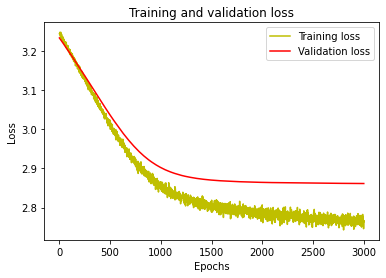

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
#plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
np.mean(prediction_test - y_test)**2

1.0991134815301432e-19

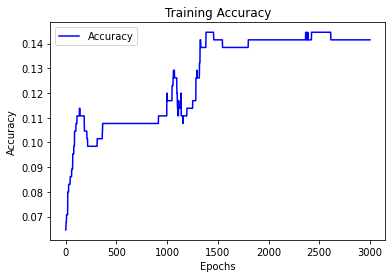

In [12]:
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
val_acc

[0.00615384615957737,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02461538463830948,
 0.02461538463830948,
 0.02769230678677559,
 0.02769230678677559,
 0.03076923079788685,
 0.03076923079788685,
 0.03076923079788685,
 0.03076923079788685,
 0.04307692125439644,
 0.04307692125439644,
 0.04307692125439644,
 0.04307692125439644,
 0.04923076927661896,
 0.04923076927661896,
 0.05538461357355118,
 0.05538461357355118,
 0.05538461357355118,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.0523076